<a href="https://colab.research.google.com/github/rixwan-khan/Credit_Card_Fraud_Detection/blob/main/climate_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing numpy library
import numpy as np

#importing pandas library
import pandas as pd

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#importing Evaluation metrics libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

> # **Phase 01: Prediction & Forecasting of Global Land Temperature:**

---

## 1. **Loading Global Land Temperature dataset:**

In [2]:
# Dataset file in Github repository
land_temp_df_url = 'https://raw.githubusercontent.com/HassanZeb01/land_temperature_by_country/refs/heads/main/GlobalLandTemperaturesByCountry.csv'

# Reading csv file
raw_df = pd.read_csv(land_temp_df_url)

# Loading 10 samples rows of dataset
raw_df.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
339553,1927-12-01,15.074,0.405,Mexico
181443,1771-04-01,6.502,7.591,France (Europe)
233610,1886-12-01,21.453,1.508,Honduras
51879,1966-09-01,27.952,0.333,Bangladesh
366382,1936-02-01,2.112,0.216,Netherlands (Europe)
525694,1945-04-01,29.803,0.635,Togo
482346,1968-09-01,27.690,0.487,Somalia
153420,1854-01-01,13.149,1.929,Egypt
472871,1759-07-01,18.938,4.690,Slovakia
239224,1911-02-01,-1.866,0.437,Hungary




---





## **2. Preprocessing - Global Land Temperature Dataset**

### **2.1. Dataset Dimensions:**

In [3]:
# Dataset dimensions (rows by column)
raw_df.shape

(577462, 4)

Total Rows   : 577462\
Total Columns: 4

In [4]:
# Total number of countries in land temperature dataset
total_countries = raw_df['Country'].nunique()
print('Total Countries',total_countries)

Total Countries 243


### **2.2. Inspecting Data type and format of the dataset:**

In [5]:
#Checking summary of dataset (Null values, datatype)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB



*   1st colum (dt) of the dataset is **date** which is stored in string format which need to be converted to **datetime** type.

*   **`AverageTemperature`** and **`AverageTemperatureUncertainty`** columns have numerical values with some missing values in it.

* Column **`Country`** has categorical data with no missing values.



### **2.3 Changing datatype and Renaming Column:**

In [6]:
#Renaming column  dt --> date
raw_df.rename(columns={'dt':'Date'}, inplace=True)

In [7]:
# Changing datatype of date column to datetime
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

In [8]:
#Rechecking the changes: Column Name, Datatype
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


### **2.4 Checking Duplicate Rows:**

In [9]:
# Checking the duplicated rows in dataset
dup = raw_df.duplicated().sum()
print('Dupicate Rows:',dup)

Dupicate Rows: 0


### **2.5 Handling Missing Values:**

In [10]:
# checking the missing values sum in dataset columns:
raw_df.isnull().sum()

,0
Date,0
AverageTemperature,32651
AverageTemperatureUncertainty,31912
Country,0


It show the missing values in columns: **`AverageTemperature`** and **`AverageTemperatureUncertainty`**

Before dealing with the missing value we need to understand the distribution of it across the whole dataset which helps in choosing the technique of removing or filling the missing values. For this reason used a small library named: `missingno`

In [11]:
#Sorting the dataset before visualizing it to check missing values.
raw_df.sort_values(['Country', 'Date'], inplace=True)

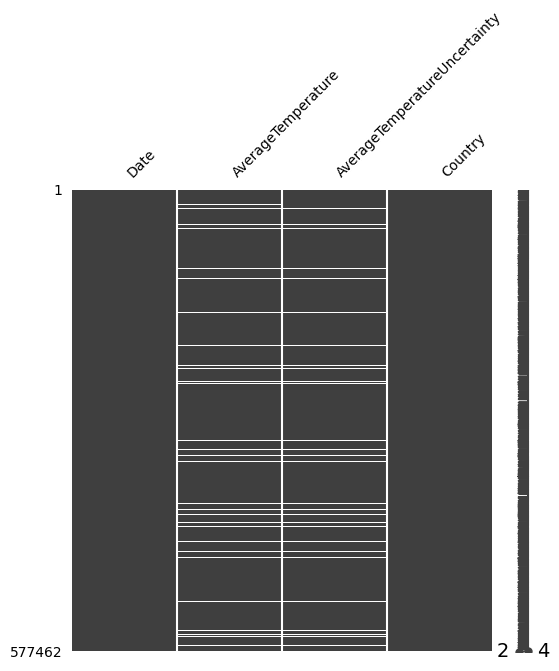

In [12]:
# open source library for visual check of missing value
# Library documentation is available at Available at: https://doi.org/10.21105/joss.00547

import missingno as msno

# assiging dataset to matrix()
msno.matrix(raw_df,figsize=(6, 6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

`AverageTemperature` and `AverageTemperatureUncertainty` shows a significant amount of data is missing across the dataset which is shown in white line and these can be filled by Forward Fill/Backward Fill.

In [13]:
############## For Columns: Average Temperature:############################
#filling missing values by using forward fill method for AverageTemperature
raw_df['AverageTemperature'] = raw_df['AverageTemperature'].fillna(method='ffill')

#filling missing values by using backward fill method for AverageTemperature
raw_df['AverageTemperature'] = raw_df['AverageTemperature'].fillna(method='bfill')
#
#
#
############## For Column: Average Temperature Uncertainty ###################
#filling missing values by using forward fill method for AverageTemperatureUncertainty
raw_df['AverageTemperatureUncertainty'] = raw_df['AverageTemperatureUncertainty'].fillna(method='ffill')

#filling missing values by using backward fill method for AverageTemperatureUncertainty
raw_df['AverageTemperatureUncertainty'] = raw_df['AverageTemperatureUncertainty'].fillna(method='bfill')

/tmp/ipython-input-2199052219.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['AverageTemperature'] = raw_df['AverageTemperature'].fillna(method='ffill')
/tmp/ipython-input-2199052219.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['AverageTemperature'] = raw_df['AverageTemperature'].fillna(method='bfill')
/tmp/ipython-input-2199052219.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['AverageTemperatureUncertainty'] = raw_df['AverageTemperatureUncertainty'].fillna(method='ffill')
/tmp/ipython-input-2199052219.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df['AverageTemperatureUncertainty'] = r

In [14]:
#Rechecking missing values after performing ffill() and bfill()
raw_df.isnull().sum()

,0
Date,0
AverageTemperature,0
AverageTemperatureUncertainty,0
Country,0


## **3. Adding New Column (Continent) in Global Land Temperature dataset:**

In order to have a better understanding of countries creating a new column `Continent `based on the column `Country`

In [15]:
# checking all unique name of all countries in dataset
country = raw_df['Country'].unique()
print(country)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Christmas Island' 'Colombia' 'Comoros' 'Congo'
 'Congo (Democratic Republic Of The)' 'Costa Rica' 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czech Republic' "Côte D'Ivoire" 'Denmark'
 'Denmark (Europe)' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Europe' 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of Micrones

In [16]:
# installing pycountry-convert library for mapping the countreis name with respective continent.
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 5.2 MB/s eta 0:00:00


In [17]:
# Countries to Continent mapping performed by using the open source library (https://pypi.org/project/country-converter/)

import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

raw_df['Continent'] = raw_df['Country'].apply(get_continent)

In [18]:
# checking total occurance of each continent
raw_df['Continent'].value_counts()

,count
Continent,
Europe,143767
Asia,107987
Africa,104971
Unknown,96018
North America,72081
South America,27303
Oceania,25335


In [19]:
# Dropping rows with continent = unknown
raw_df = raw_df[raw_df['Continent'] != 'Unknown']

# Recheching the sampels of dataset after mapping continent
raw_df.sample(7)

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Continent
222843,1953-02-01,5.310,0.342,Guernsey,Europe
60391,1946-06-01,14.892,0.343,Belgium,Europe
37272,1787-04-01,4.620,3.093,Austria,Europe
535451,1924-06-01,20.570,0.432,Turkey,Asia
57777,1998-07-01,17.681,0.184,Belarus,Europe
414315,1801-09-01,14.848,1.993,Poland,Europe
99885,1987-11-01,-10.219,0.253,Canada,North America


## **4. Exploratory Data Analysis (EDA):**

### **4.1 Statistical Analysis of Dataset:**

In [20]:
# Checking statistical analysis of dataset by checking (mean,median,min,max)
raw_df.describe()

,Date,AverageTemperature,AverageTemperatureUncertainty
count,481444,481444.000000,481444.000000
mean,1909-03-06 20:27:51.970156544,17.564705,1.068513
min,1743-11-01 00:00:00,-37.658000,0.052000
25%,1863-02-01 00:00:00,10.911000,0.336000
50%,1913-12-01 00:00:00,21.320000,0.617000
75%,1963-11-01 00:00:00,25.767000,1.344000
max,2013-09-01 00:00:00,38.842000,13.954000
std,NaN,10.788909,1.193934


### **4.2 Distribution Analysis:**

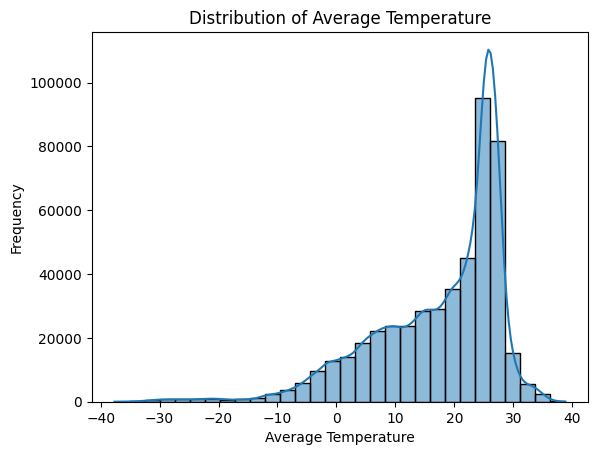

In [21]:
# histogram plot for column (AverageTemperature) to check the distribution
sns.histplot(raw_df['AverageTemperature'], bins=30, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

Distribution for `Average temperature`shows that 25°C was the most frequent temperatue and it is left-skewed dataset.

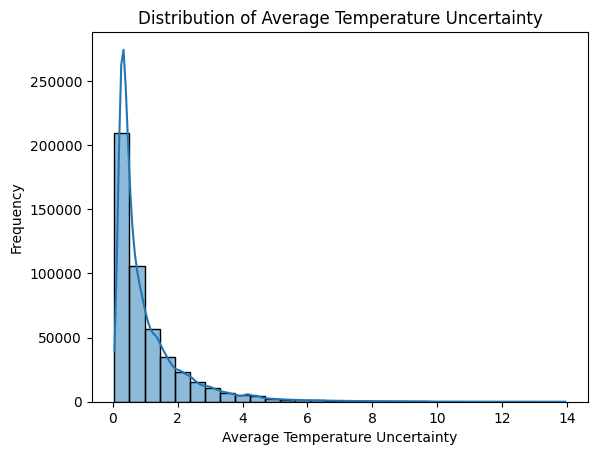

In [22]:
# histogram plot for column (AverageTemperatureUncertainty) to check hte distribution
sns.histplot(raw_df['AverageTemperatureUncertainty'], bins=30, kde=True)

plt.title('Distribution of Average Temperature Uncertainty')
plt.xlabel('Average Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

Distribution of `Average Temperature Uncertainty` is heavily right-skewed and most of the observation are close to zero which means the actual measurment of the `Average temprature` is mostly accurate.

### **4.3 Correlation Analysis:**

In dataset there is only two columns `Average temperature` and `Average Temperature Uncertainty` which have  numerical values and will perform correlation on these two columns.

In [23]:
# Checking the correlation betweeen the numerical columns of dataset.
correlation = raw_df['AverageTemperature'].corr(raw_df['AverageTemperatureUncertainty'])

# printing the correlation value
print(f'Correlation:{correlation:.4f}')

Correlation:-0.2650


Correlation between both columns are negatively very weak which means there is very slight effect of uncertainty on temperature when it is rises.

### **4.4 Trend Analysis:**

#### **A. Yearly Average Temperature - Globally:**

In [24]:
# For Trend of the Average Temperature performing yearly based.
# Taking only year from the date
raw_df = raw_df.reset_index()
raw_df['Year'] = raw_df['Date'].dt.year

# Grouping the temperature column values based on year
df_yearly = raw_df.groupby('Year')['AverageTemperature'].mean().reset_index()

# line plot for yearly global average temperature
fig = px.line(df_yearly, x='Year', y='AverageTemperature',title='Global Average Temperature trend')
fig.show()

#### **B. Average Temperature by Continent:**

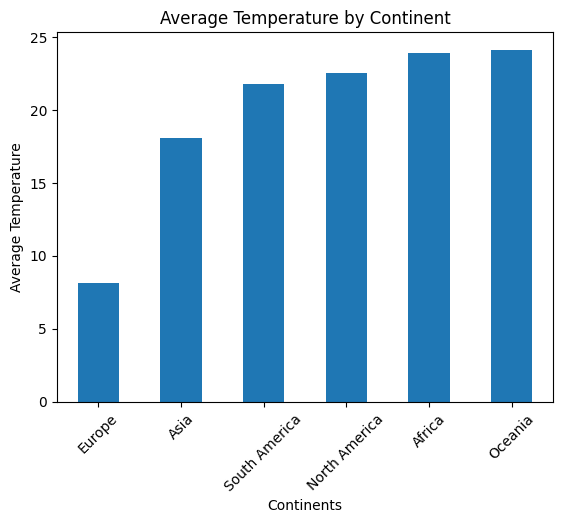

In [25]:
# Checking the Average Temperatue based on the continent

#Grouppiong the temperature by Column - Continent
continent_temp = raw_df.groupby('Continent')['AverageTemperature'].mean().sort_values()

#ploting Average temperature of each continent
continent_temp.plot(kind='bar')
plt.title('Average Temperature by Continent')
plt.xlabel('Continents')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()

#### **C. Top 10 Coldest Countries:**

In [26]:
# plotting top 10 coldest countries

# grouping temperature column by country
countries_temp = raw_df.groupby('Country')['AverageTemperature'].mean()

In [27]:
# sorting top 10 low temperature countries
cold_countries = countries_temp.sort_values(ascending=True).head(10)

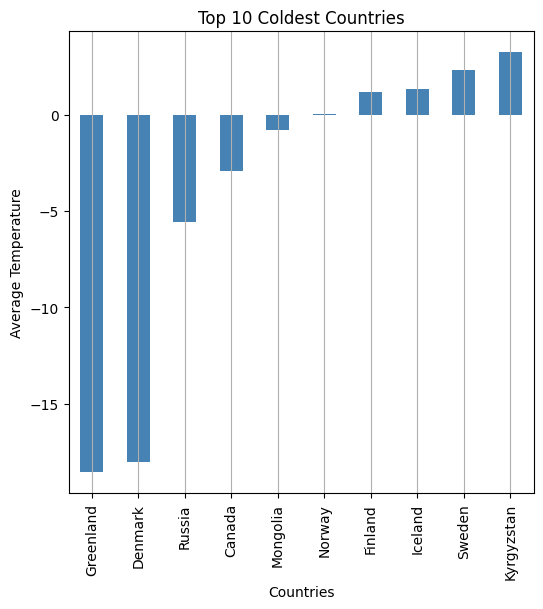

In [28]:
# ploting top 10 coldest weather countries.
plt.figure(figsize=(6,6))
cold_countries.plot(kind='bar', color='steelblue')
plt.title('Top 10 Coldest Countries')
plt.xlabel('Countries')
plt.ylabel('Average Temperature')
plt.grid(axis='x')
plt.show()

#### **D. Top 10 Hotest Countries:**

In [29]:
# sorting top 10 high temperature countries
hot_countries = countries_temp.sort_values(ascending=False).head(10)

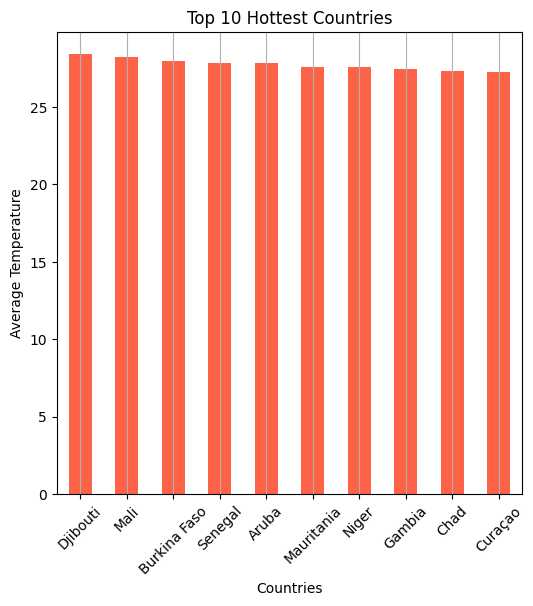

In [30]:
# Ploting top 10 hotest weather countries.
plt.figure(figsize=(6,6))
hot_countries.plot(kind='bar', color='tomato')
plt.title('Top 10 Hottest Countries')
plt.xlabel('Countries')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

## **5. Pre-processing for Time Series Modeling:**

In [31]:
#importing relevant libraries for time series preprocessing steps:
#
#importing library for adfuller test
from statsmodels.tsa.stattools import adfuller

#importing library for ACF PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing library for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting index to date column
raw_df.set_index('Date', inplace=True)

# Grouping by year
yearly_temp = raw_df['AverageTemperature'].resample('YE').mean()

### **5.1 Stationarity Check:**

In [32]:
# Adfulller test
adf_test = adfuller(yearly_temp)

In [33]:
# Adfuller test results:
print('p-value:', adf_test[1])


p-value: 0.16738808198697092



Here p-value is not less than 0.05 due to which null hypothesis is not rejected and `yearly_temp` series is non-stationary.

**Due to this reason need to make series stationary by doing differencing.**

### **5.2 Differencing:**

In [34]:
# applying 1st level of differencing on dataset.
diff_series1 = yearly_temp.diff().dropna()

/tmp/ipython-input-3739628515.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

/tmp/ipython-input-3739628515.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



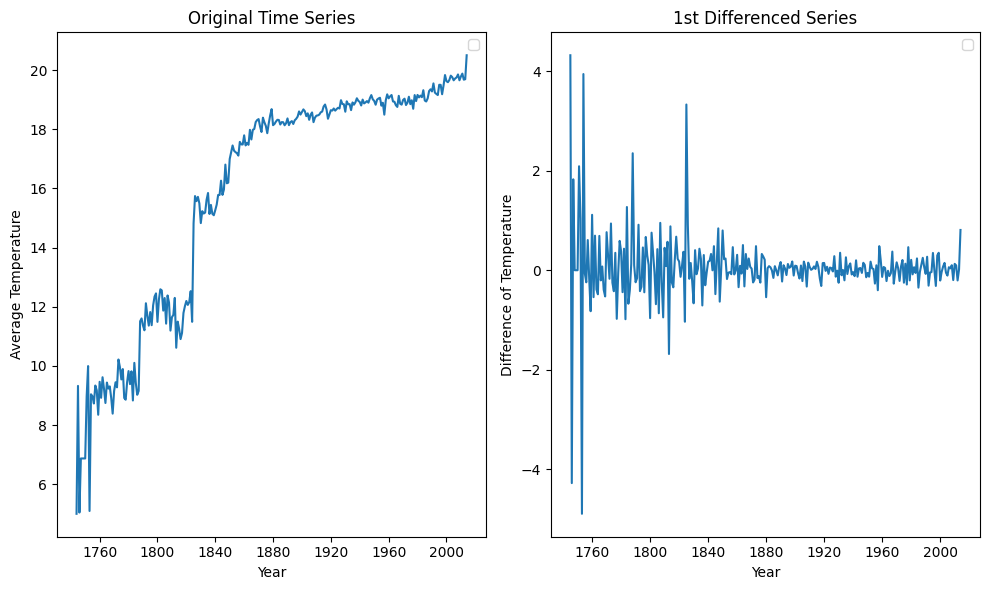

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(yearly_temp)
plt.title('Original Time Series')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(diff_series1)
plt.title('1st Differenced Series')
plt.xlabel('Year')
plt.ylabel('Difference of Temperature')
plt.legend()

plt.tight_layout()
plt.show()

Again performing the ADF test on 1st differenced series of temperature.

In [36]:
# ADF test on 1st level of differencing.
diff_adf = adfuller(diff_series1)

# Printing adfuller test result
print(f'p-value:', diff_adf[1])


p-value: 3.3600303474529247e-06


p-value << 0.05 due to which now null-hypothesis is rejected and `yearly_temp` series is stationary.

### **5.3 Seasonality Check:**

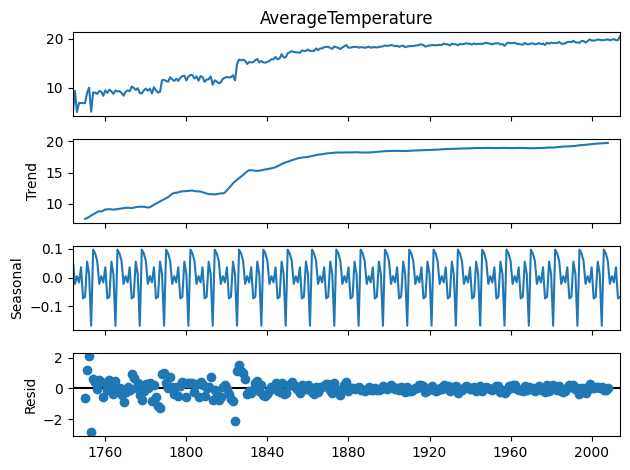

In [37]:
# Checking seasonality in dataset.
seasonal = seasonal_decompose(yearly_temp, model='additive', period = 12)
seasonal.plot()
plt.show()

### **5.4 Autocorrelation (ACF) and Partial Autocorrelation Analysis (PACF):**

#### **Finding Value of q:**

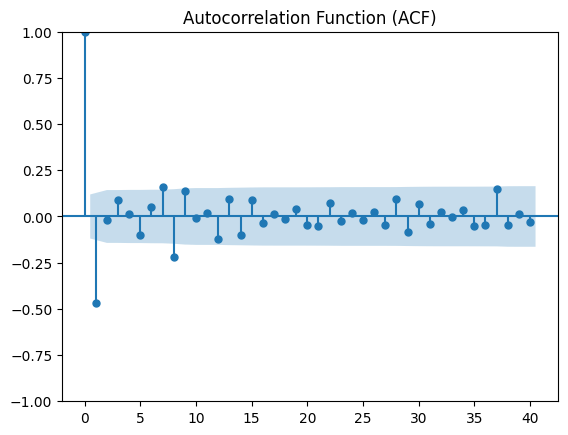

In [38]:
#ACF plot to fine the value of MA(q)
plot_acf(diff_series1, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

ACF plot on the first order differencing on the dataset shows that first two lags are outside confidence interval which means value of MA (q) = 2

#### **Finding value of p:**

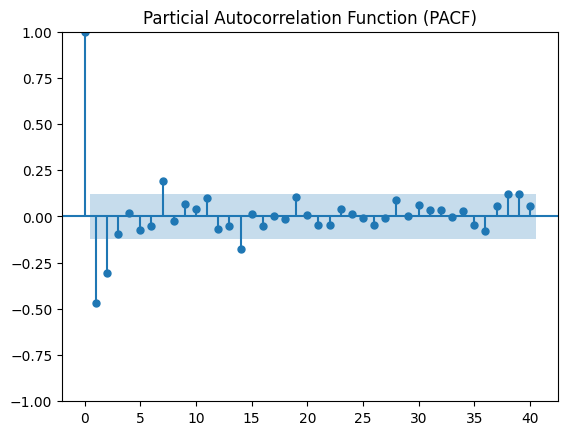

In [39]:
#PACF plot to find the valu of AR (p)
plot_pacf(diff_series1, lags=40)
plt.title('Particial Autocorrelation Function (PACF)')
plt.show()

PACF plot on the first order differencing on the dataset shows that first three lags are outside the confidence interval which means current temperature is influanced by the past three observations which is why value of AR (p) = 3.

## **6. Time Series Model - SARIMA:**

#### **6.1 Taking the Subset of Dataset:**

In [40]:
# Arranging the dataset in ascending order
raw_df = raw_df.sort_index()

Total rows in dataset are 559157 which is a huge number and make colab environment crash taking teh subset of original dataset.

In [41]:
#Only taking record from 1960 to 2013
# Sampling based on slicing
sub_temp_df = raw_df.loc['1960-01-01':'2013-09-01']

In [42]:
# checking the summary of sub dataset.
sub_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129645 entries, 1960-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          129645 non-null  int64  
 1   AverageTemperature             129645 non-null  float64
 2   AverageTemperatureUncertainty  129645 non-null  float64
 3   Country                        129645 non-null  object 
 4   Continent                      129645 non-null  object 
 5   Year                           129645 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 6.4+ MB


In [43]:
# converting the data type of column Year to datetime
sub_temp_df.loc[:,'Year'] = pd.to_datetime(sub_temp_df['Year'],format='%Y')

/tmp/ipython-input-328925881.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1960-01-01 00:00:00', '1960-01-01 00:00:00',
 '1960-01-01 00:00:00', '1960-01-01 00:00:00', '1960-01-01 00:00:00',
 '1960-01-01 00:00:00', '1960-01-01 00:00:00', '1960-01-01 00:00:00',
 '1960-01-01 00:00:00',
 ...
 '2013-01-01 00:00:00', '2013-01-01 00:00:00', '2013-01-01 00:00:00',
 '2013-01-01 00:00:00', '2013-01-01 00:00:00', '2013-01-01 00:00:00',
 '2013-01-01 00:00:00', '2013-01-01 00:00:00', '2013-01-01 00:00:00',
 '2013-01-01 00:00:00']
Length: 129645, dtype: datetime64[ns]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [44]:
# first 7 smaples of subset dataset.
sub_temp_df.sample(7)

,index,AverageTemperature,AverageTemperatureUncertainty,Country,Continent,Year
Date,,,,,,
1970-07-01,536004,23.278,0.141,Turkey,Asia,1970-01-01
1984-10-01,47218,26.816,0.215,Bahrain,Asia,1984-01-01
1978-07-01,513911,30.655,0.329,Syria,Asia,1978-01-01
1986-05-01,12941,28.698,0.407,Algeria,Africa,1986-01-01
2004-02-01,564500,26.196,0.223,Venezuela,South America,2004-01-01
1963-11-01,54122,27.055,0.352,Barbados,North America,1963-01-01
1973-03-01,29682,1.880,0.505,Armenia,Asia,1973-01-01


In [45]:
# montly mean record of Average temperature
monthly_temp_df = sub_temp_df['AverageTemperature'].resample('ME').mean()

#### **6.2 Spliting the dataset for training and testing:**

In [46]:
#spliting the dataset into 80% for Training and 20% for Testing
#
# - Calculating the 80% of dataset.
size = int(len(monthly_temp_df)*0.8)

# - First 80% for train
train = monthly_temp_df.iloc[:size]

# - Last 20% for test
test = monthly_temp_df.iloc[size:]

### **6.3 SARIMA implementation:**

In [47]:
# importing the library for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining the SARIMAX parameters:
#
# Assigned training set, non-seasonal part (p,d,q), seasonal part (P,D,Q,s)
#                                                   s = 12 month of the year.
model = SARIMAX(train, order=(3,1,2), seasonal_order=(1,1,1,12))

# Fitting model to the training set
results = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [48]:
# Forecasting on test data.
# start = 1st date of the test data,  end = last date of the test data.
pred = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=True)

# only took predicted_mean values
pred_mean = pred.predicted_mean


### **6.4 SARIMA Model Evaluation:**

In [49]:
from sklearn.metrics import mean_squared_error

# Model Evaluation
mse = mean_squared_error(test, pred_mean)
rmse = np.sqrt(mse)

# Printing resutls.
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')


Mean Squared Error: 0.0999
Root Mean Squared Error: 0.3160


### **6.5 Visualization of Model prediction:**

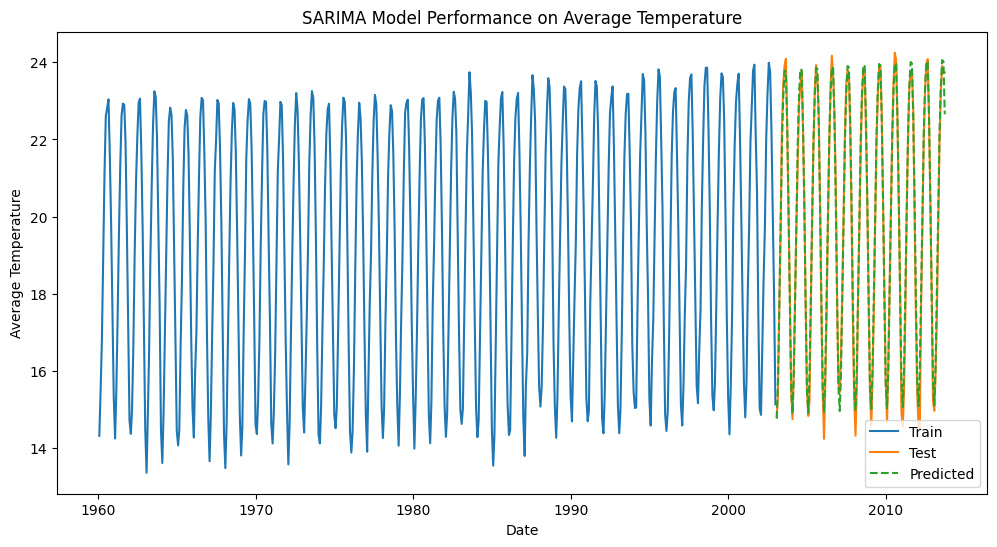

In [50]:
# Visualization of result.

# Plot figure size
plt.figure(figsize=(12,6))

# Training data plot
plt.plot(train.index, train, label='Train')

# Testing data plot
plt.plot(test.index, test, label='Test')

# Predicted data plot
plt.plot(pred_mean.index, pred_mean, label='Predicted', linestyle='--')
plt.title('SARIMA Model Performance on Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

### **6.6 SARIMAX - 24 Months Forecast**

In [51]:
# creating a forecast for next 24 months
forecast = results.forecast(steps=24)

# forecast date range
next_year = pd.date_range(start=test.index[-1]+pd.DateOffset(months=1), periods=24,freq='ME')

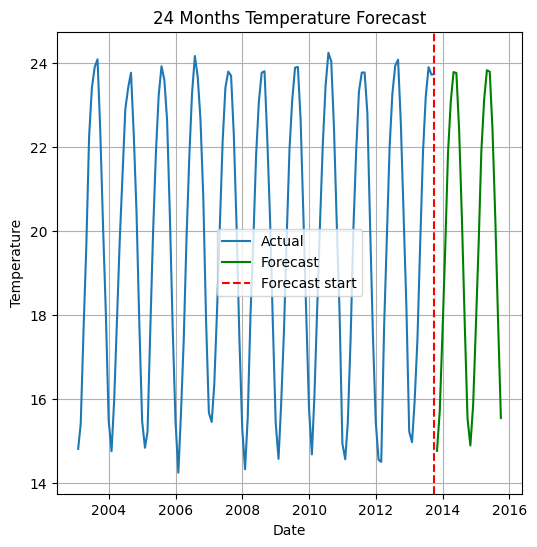

In [52]:
#Plotting the Forcast for next 24 monts
plt.figure(figsize=(6,6))
plt.plot(test, label='Actual')
plt.plot(next_year, forecast, label='Forecast', color='green')
plt.axvline(monthly_temp_df.index[-1], color='red', linestyle='--', label='Forecast start')
plt.title('24 Months Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

## **7. LSTM Model Implementation:**

In [100]:
# importing libraries for LSTM model

# train_test_split library
from sklearn.model_selection import train_test_split

# library for normalization (0,1)
from sklearn.preprocessing import MinMaxScaler

#LSTM libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input

### **7.1 Normalizating data:**

In [101]:
# Normalizing the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# reshapping the data to 2D
data_scaling = scaler.fit_transform(
    monthly_temp_df.values.reshape(-1,1)
    )

### **7.2 Input & Output pairs for LSTM:**

In [102]:
  # For LSTM model converting dataset in input and output pair
def lstm_sequence(data, n_steps):
    X = []
    y = []
    for i in range(len(data)- n_steps):
      X.append(data[i:i+n_steps])       # past values as input
      y.append(data[i+n_steps])         # values as target
    return np.array(X), np.array(y)     # list conversion to numpy array

In [104]:
# Using last 12 months for the next month forecast
n_steps=12

# scaled data into input & output sequence
X, y = lstm_sequence(data_scaling, n_steps)

### **7.3 Traing and Testing Sets:**

In [57]:
# Spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

### **7.4 LSTM Model - Implementation:**

In [108]:
# LSTM model building
model = Sequential()
model.add(Input(shape=(n_steps,1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [59]:
# LSTM Model training
result = model.fit(X_train,y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3255 - val_loss: 0.1199
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0926 - val_loss: 0.0862
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0723 - val_loss: 0.0508
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0448 - val_loss: 0.0128
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0087
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0070
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - val_loss: 0.0052
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - va

In [60]:
# LSTM Model Validation
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [61]:
# Transfoming the data back to original format.
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_actual = scaler.inverse_transform(y_pred)

### **7.5 LSTM model Evaluation:**

In [62]:
#Model Evaluation:
lstm_mse = mean_squared_error(y_test_actual,y_pred_actual)
print(f'Mean Squared Error:{lstm_mse:.4f}')

lstm_rmse = root_mean_squared_error(y_test_actual,y_pred_actual)
print(f'Root Mean Square Error: {lstm_rmse:.4f}')


Mean Squared Error:0.1372
Root Mean Square Error: 0.3704


### **7.6 Visulization of Model Prediction:**

In [63]:
dates = monthly_temp_df.index[n_steps:]

test_dates = dates[int(len(dates)*0.8):]

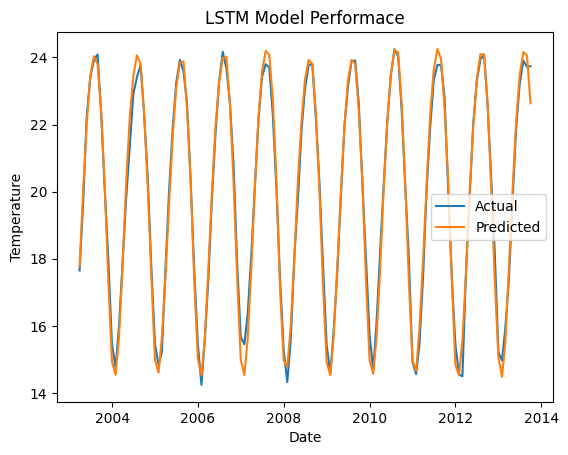

In [99]:
# Visulization of LSTM model Prediciton
plt.plot(test_dates, y_test_actual, label='Actual')
plt.plot(test_dates, y_pred_actual, label='Predicted')
plt.title('LSTM Model Performace')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


> # **Phase 02: Correlation between CO2 Emission and Land Temperature:**
---



### **1. Loading dataset of CO2 Emission:**

In [65]:
# imporitng the 2nd dataset of CO2 emission for githbu
co2_df_url = 'https://raw.githubusercontent.com/HassanZeb01/land_temperature_by_country/refs/heads/main/co2_emissions_kt_by_country.csv'

# reading the csv file of dataset.
co2_df = pd.read_csv(co2_df_url)

#loading 1o sample rows of dataset.
co2_df.sample(10)

,country_code,country_name,year,value
5693,IDN,Indonesia,1963,2.278307e+04
1040,BFA,Burkina Faso,2015,3.700000e+03
6087,ISL,Iceland,1997,2.150000e+03
13845,ZMB,Zambia,1968,4.572749e+03
6687,KNA,St. Kitts and Nevis,1998,1.800000e+02
11328,SOM,Somalia,1994,6.300000e+02
5471,IBD,IBRD only,1981,8.953267e+06
11488,SSF,Sub-Saharan Africa,1974,3.103138e+05
8161,MEX,Mexico,2016,4.733100e+05
2771,CYM,Cayman Islands,1966,1.833500e+01


## **2. Data Cleaning & Preprocessing on CO2 Dataset:**

### **2.1 CO2 Emission Dataset Dimensions:**

In [66]:
# Dataset dimension check (rows by columns)
co2_df.shape

(13953, 4)

Total Rows: 13953\
Total Columns:4


### **2.2 Inspecting Data type and format of the dataset:**

In [67]:
# checking dataset summary (Null values, datatypes)
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


### **2.3 Changing Data Type of Column: Year**

In [68]:
# Column - year datatype changed to datetime.
co2_df['year'] = pd.to_datetime(co2_df['year'], format='%Y', errors='coerce')

### **2.4 Renaming Column Name:**

In [69]:
#Renaming column
co2_df.rename(columns={'value':'co2-emission', 'country_name':'Country', 'year':'Year'}, inplace=True)

# Rechecking the changes of column name change
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   country_code  13953 non-null  object        
 1   Country       13953 non-null  object        
 2   Year          13953 non-null  datetime64[ns]
 3   co2-emission  13953 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 436.2+ KB


### **2.5 Dataset Time Range:**

In [70]:
#checking the minimum value of year
start_year = co2_df['Year'].min()

#checking the maximum value of year
last_year = co2_df['Year'].max()

print('Dataset Time Rage: '+ str(start_year.date()) + " - " + str(last_year.date()))

Dataset Time Rage: 1960-01-01 - 2019-01-01


### **2.6 Mapping Countries to Continent:**

In [71]:
# printing all countries name
countries = co2_df['Country'].unique()
print(countries)

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ecuador' 'Egypt

In [72]:
# Countries to Continent mapping performed by using the open source library (https://pypi.org/project/country-converter/)

import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

co2_df['Continent'] = co2_df['Country'].apply(get_continent)

In [73]:
co2_df.sample(10)

,country_code,Country,Year,co2-emission,Continent
13052,UGA,Uganda,2013-01-01,3.690000e+03,Africa
4780,GRC,Greece,1974-01-01,3.621896e+04,Europe
10146,PRE,Pre-demographic dividend,1976-01-01,1.494376e+05,Unknown
1152,BGR,Bulgaria,2007-01-01,5.260000e+04,Europe
8990,NAM,Namibia,2009-01-01,3.020000e+03,Africa
11625,STP,Sao Tome and Principe,1991-01-01,5.000000e+01,Africa
1223,BHR,Bahrain,2018-01-01,3.081000e+04,Asia
9926,PHL,Philippines,1996-01-01,6.722000e+04,Asia
11300,SOM,Somalia,1966-01-01,1.393460e+02,Africa
13241,USA,United States,1992-01-01,4.879630e+06,North America


In [74]:
# checking total occurance of each continent
co2_df['Continent'].value_counts()

,count
Continent,
Unknown,3878
Africa,2789
Asia,2165
Europe,2064
North America,1570
Oceania,827
South America,660


### **2.7 Dropping Continent = Unknow:**

In [75]:
# Dropping rows with continent = unknown
clean_co2_df = co2_df[co2_df['Continent'] != 'Unknown']
clean_co2_df.sample(7)

,country_code,Country,Year,co2-emission,Continent
2793,CYM,Cayman Islands,1988-01-01,223.687000,North America
6265,JAM,Jamaica,1995-01-01,8680.000000,North America
13188,URY,Uruguay,1999-01-01,6780.000000,South America
576,ARM,Armenia,1999-01-01,3110.000000,Asia
11627,STP,Sao Tome and Principe,1993-01-01,40.000000,Africa
12993,TZA,Tanzania,2014-01-01,10710.000038,Africa
9315,NOR,Norway,1977-01-01,31070.491000,Europe


## **3. Merging Global Land Temperature  &  CO2 Emission Dataset:**

### **3.1 Merging Land Temperature & CO2 Emission Dataset:**

In [76]:
# Merging dataset on column:Year and Country
co2_temp_df = pd.merge(sub_temp_df,clean_co2_df, on=['Year','Country'], how='inner')

### **3.2 Loading Merged Dataset:**

In [77]:
# Merged dataset smaple
co2_temp_df.sample(10)

,index,AverageTemperature,AverageTemperatureUncertainty,Country,Continent_x,Year,country_code,co2-emission,Continent_y
89143,508603,-9.916,0.288,Sweden,Europe,2011-01-01,SWE,44580.001831,Europe
34113,191123,27.232,0.357,French Polynesia,Oceania,1981-01-01,PYF,330.030000,Oceania
77211,284759,21.511,0.402,Kuwait,Asia,2004-01-01,KWT,61909.999847,Asia
7578,405442,25.882,0.315,Panama,North America,1964-01-01,PAN,1243.113000,North America
90429,108225,25.242,0.468,Chad,Africa,2011-01-01,TCD,1100.000024,Africa
66682,522739,27.243,0.223,Thailand,Asia,1999-01-01,THA,163790.000000,Asia
45309,459893,28.449,0.312,Senegal,Africa,1987-01-01,SEN,2453.223000,Africa
1297,542479,22.929,0.350,Uganda,Africa,1960-01-01,UGA,421.705000,Africa
45664,465856,27.973,0.545,Seychelles,Africa,1988-01-01,SYC,198.018000,Africa
68071,227361,26.073,0.325,Guinea,Africa,2000-01-01,GIN,1490.000000,Africa


### **3.3 Renaming & Dropping Columns:**

In [78]:
#Continent_y column renamed to Continent
co2_temp_df['Continent'] = co2_temp_df['Continent_y']

# Dropped irrelevant columns
co2_temp_df.drop(columns=['index','AverageTemperatureUncertainty','country_code','Continent_x','Continent_y'], inplace=True)

In [79]:
# Loading sample of merged dataset
co2_temp_df.sample(10)

,AverageTemperature,Country,Year,co2-emission,Continent
71534,25.627,Costa Rica,2001-01-01,5420.000000,North America
71352,26.071,Niger,2001-01-01,670.000000,Africa
83459,18.952,Argentina,2008-01-01,167229.995728,South America
66097,-2.357,Liechtenstein,1999-01-01,230.000000,Europe
83699,12.536,Armenia,2008-01-01,5690.000057,Asia
90608,23.463,Uganda,2011-01-01,3740.000010,Africa
24027,22.693,Honduras,1974-01-01,1558.475000,North America
93478,23.909,Gabon,2013-01-01,5789.999962,Africa
26867,30.645,Niger,1976-01-01,333.697000,Africa
33103,27.701,Singapore,1980-01-01,31433.524000,Asia


In [80]:
# reching the dimension of the merged dataset after dropoing the columns
co2_temp_df.shape

(94083, 5)

### **3.4 Checking Duplicates in merged dataset:**

In [81]:
# Checking the duplicates in merged dataset
dup = co2_temp_df.duplicated()
print('Duplicate Row:',dup.sum())

Duplicate Row: 227


In [82]:
# dropping duplicated rows from merged dataset.
co2_temp_df.drop_duplicates(inplace=True)

### **3.5 Checking Missing Values in merged dataset:**

In [83]:
# checking the missing values in merged dataset
co2_temp_df.isna().sum()

,0
AverageTemperature,0
Country,0
Year,0
co2-emission,0
Continent,0


## **4. Exploratory Data Analysis (EDA) for CO2 Emission Dataset:**

### **4.1 Yearly Global Trend of CO2 Emission:**

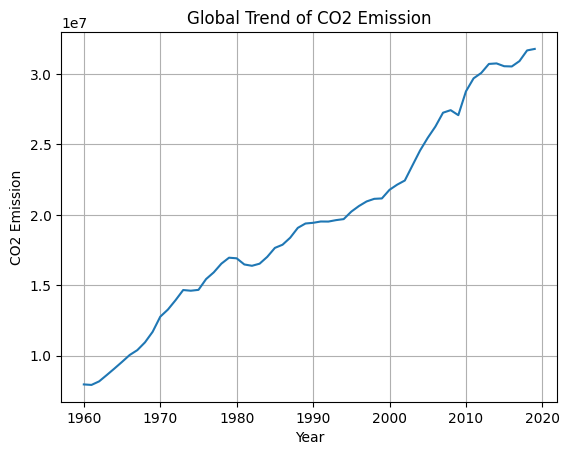

In [84]:
# Grouping co2-emission by year
co2_trend = clean_co2_df.groupby('Year')['co2-emission'].sum()

plt.plot(co2_trend.index, co2_trend.values)
plt.title('Global Trend of CO2 Emission')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.grid(True)
plt.show()

### **4.2 CO2 Emission by Contient:**

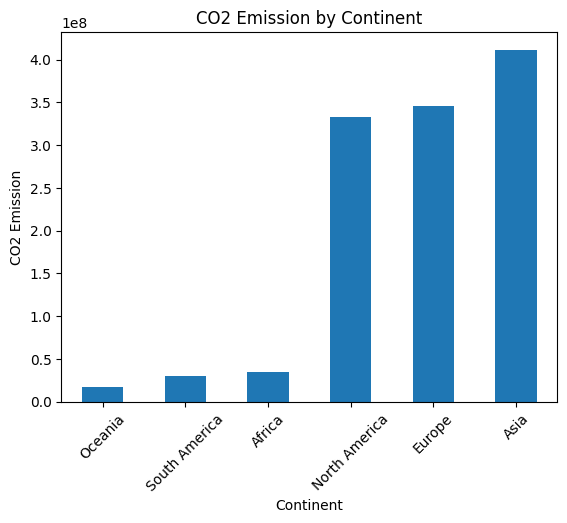

In [85]:
# grouping co2-emission by contient
co2_emission = clean_co2_df.groupby('Continent')['co2-emission'].sum()

top10 = co2_emission.sort_values(ascending=True).head(10)

top10.plot(kind='bar')
plt.title('CO2 Emission by Continent')
plt.xlabel('Continent')
plt.ylabel('CO2 Emission')
plt.xticks(rotation=45)
plt.show()

### **4.3 CO2 Emission of Top 7 Countries:**

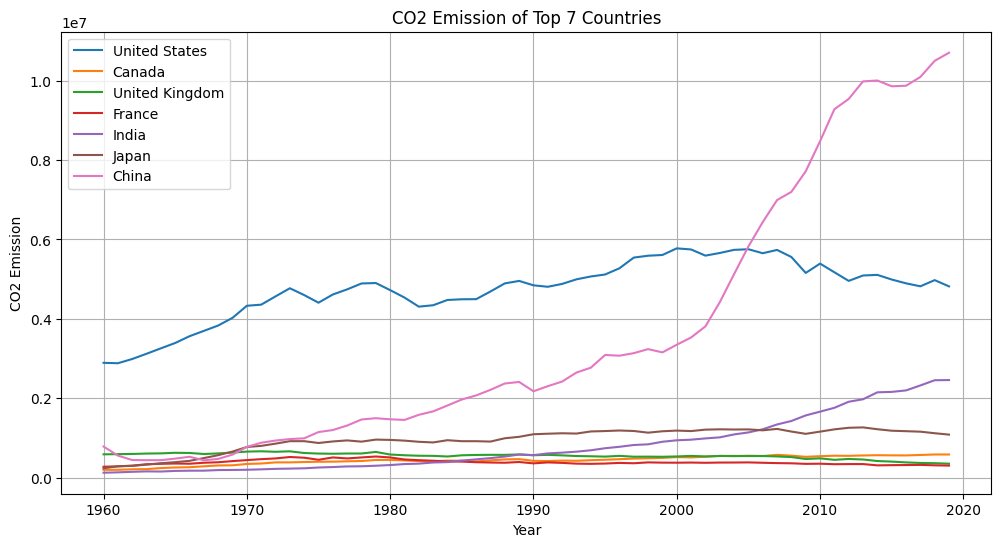

In [86]:
# list of top 7 countries for co2 emission value
top7 = ['United States', 'Canada', 'United Kingdom', 'France', 'India', 'Japan', 'China']

# ploting top 7 countries emission values.
plt.figure(figsize=(12,6))
for country in top7:
  data = clean_co2_df[clean_co2_df['Country']==country]
  plt.plot(data['Year'], data['co2-emission'],label=country)

plt.title('CO2 Emission of Top 7 Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.grid(True)
plt.legend()
plt.show()

### **4.4 Distribution Analysis of CO2-Emission:**

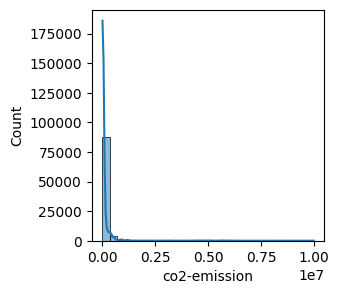

In [87]:
# Co2 emission distribution
plt.figure(figsize=(3,3))
sns.histplot(co2_temp_df['co2-emission'], bins=30, kde=True)
plt.show()

CO2 Emissiong values are right skeweed and most of the values are around zero. In order to get the better understanding of CO2 Emission data applying Log1 on it.

### **4.5 Log based CO2 Emission:**

In [88]:
# Only taking values greater than or equal to zero
co2_temp_df = co2_temp_df[co2_temp_df['co2-emission'] >= 0]

#Applying Log 1 on column co2-emission.
co2_temp_df['logged_co2_emission'] = np.log1p(co2_temp_df['co2-emission'])

#### **4.5.1 Logged - CO2 Emission Distribution:**

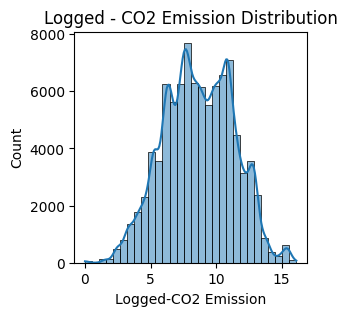

In [89]:
# Ploting CO2 Graph.
plt.figure(figsize=(3,3))
sns.histplot(co2_temp_df['logged_co2_emission'], bins=30, kde=True)
plt.title('Logged - CO2 Emission Distribution')
plt.xlabel('Logged-CO2 Emission')
plt.ylabel('Count')
#plt.grid(True)
plt.show()

### **4.6 Normaliziong CO2 Emisson Values:**

In [90]:
# Normalizing the CO2 emsision values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

co2_temp_df['scale_log_co2_emission'] = scaler.fit_transform(co2_temp_df[['logged_co2_emission']])

### **4.7 Correlation Analysis:**

In [91]:
# correltion between Average Temperature and CO2 Emission Column.
corr = co2_temp_df['AverageTemperature'].corr(co2_temp_df['logged_co2_emission'])
print(f'Correlation Value: {corr:.4f}')

Correlation Value: -0.3453


## **5. Random Forest Model Implementation:**

### **5.1 Training and Testing Sets:**

In [92]:
# Spliting dataset for training and tesing data.
# = Droping Column:AverageTemperature from dataset
X = co2_temp_df.drop(columns=['AverageTemperature','co2-emission','logged_co2_emission'])

y = co2_temp_df['AverageTemperature']

#### **5.1.1 One Hot Encoding on Categorical Value of Features:**

In [93]:
# Appling one hot encoding on the categoreical column of the dataset.
encoded_X = pd.get_dummies(X, columns=['Country', 'Continent'], drop_first=True)
encoded_X['Year'] = pd.to_datetime(encoded_X['Year'], errors='coerce').dt.year

In [94]:
# Training and testing dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    encoded_X, y, test_size=0.2, random_state=42
)

### **5.2 Random Forest Model - Training:**

In [95]:
# importing randorm forest library
from sklearn.ensemble import RandomForestRegressor

In [96]:
# Traing and fitting random forest model regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### **5.3 Random Forest Model - Validation:**

In [97]:
# Prediciton of model.
rf_y_pred = rf_model.predict(X_test)

### **5.4 Random Forest Model - Evaluation:**

In [98]:
#assigning actual value and predicted values to mean square error
rf_mse = mean_squared_error(y_test, rf_y_pred)

# taking square-root of mean square error
rf_rmse = np.sqrt(rf_mse)

#pring mse and rmse.
print(f'Mean Squared Error: {rf_mse:.4f}')
print(f'Root Mean Squared Error:{rf_rmse:.4f}')

Mean Squared Error: 31.3190
Root Mean Squared Error:5.5963
